# Project Phase 2
#### Amina Shikhalieva (as2642), Gauri Pidatala (vp223)


### Research Questions:


##### What makes a class "good" ?
* How do variables such as class size, course level, and Piazza activity correlate sentiment towards a course?

### Data Collection and Cleaning


We primarily use web scraping to acquire data and store it in two tables.

**piazza.com** 
* See "piazza_data_collect.ipynb"
* Every course on Piazza has a stats report accessible to anyone enrolled in the class (under the statistics tab). A few courses do not have this report because there was not enough piazza activity. 
* We compiled a list of courses (with no duplicates) from various departments taught in various semesters that used piazza.com as an interactive platform. For each of these courses, we recorded the URL for its stats page in the file "piazza_stats.txt". Here we also manually added the semester corresponding to each stats report. We then iterated through each of the URLs in the file and recorded in [ piazza .csv ] various attributes for each course:

**ratemyprofessors.com** 
* See "data_collect.ipymb"
* We manually associate each course element of our piazza.csv database with the name of the professor who taught it that semester. We then manually aqcuire the URLs of the associated ratemyprofessors.com page of each of these professors and record them in the file "Rate_my_prof.txt". We then iterate through each URL in this file and scrape the necessary attributes for each review for the course we are looking for.
* Because a review page for a professor includes many 
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

piazza_data = pd.read_csv('piazza.csv')
ratings_data = pd.read_csv('rmp.csv')
piazza_data



,Course#,Professor,Total_Q,%Response,#Contributions,Avg_Response_Time,Enrolled,instructor_response,%Active,semester
0,PHYS 2213 S19,Alan Giambattista\n,473,100%,1895,22,259,63%,47%,SP19
1,MATH 2930,Alan Zehnder\n,390,99%,1398,39,417,74%,43%,SP20
2,MATH 1920,Reyer Sjamaar\n,323,100%,1281,49,543,74%,31%,FA18
3,ENGRD 2700,Yudong Chen\n,200,99%,546,40,162,88%,50%,FA19
4,ECE/ENGRI 1210,David Albonesi\n,341,100%,1204,26,135,90%,58%,SP19
5,CS 3220,Anil Damle\n,83,95%,252,24,37,94%,73%,FA19
6,CS 2800,Michael George\n,1198,97%,4700,20,419,85%,60%,SP19
7,CS 2110,Anne Bracy\n,1231,100%,5196,9,618,86%,57%,FA18
8,CS 2850,David Easley\n,844,97%,2799,39,506,69%,61%,FA19
9,MATH 2930,Alex Townsend\n,745,98%,3158,40,430,70%,54%,FA18


**cleaning**
* As of now, some of our piazza stats course names are irregular. Because there is only a small number of these irregularities and they don't follow any particular pattern, we chose to manually fix each one
* We also need to get rid of the '%' following the values in columns "% response" and "instructor_response"
* We also want to be able to group our courses by departments

In [2]:
piazza_data['Course#'][0] = 'PHYS 2213'
piazza_data['Course#'][4] = 'ECE 1210'
piazza_data['Course#'][3] = 'ORIE 2700'
piazza_data['Course#'][21] = 'PHYS 2213'

piazza_data['Course#'][23] = 'ORIE 2700'
piazza_data['Course#'][32] = 'PHYS 2213'
piazza_data['Course#'][35] = 'PHYS 2213'
piazza_data['Course#'][37] = 'ECE 2720'
piazza_data['Course#'][39] = 'ECE 2100'
piazza_data['Course#'][44] = 'INFO 4240'


piazza_data['%Response'] = (piazza_data['%Response'].str.slice(stop=-1)).astype(int)
piazza_data['instructor_response'] = (piazza_data['instructor_response'].str.slice(stop=-1)).astype(int)
piazza_data['%Active'] = (piazza_data['%Active'].str.slice(stop=-1)).astype(int)
piazza_data['Avg_Response_Time'] = (piazza_data['Avg_Response_Time']).astype(int)



piazza_data['Total_Q'] = (piazza_data['Total_Q']).astype(int)
piazza_data['Enrolled'] = (piazza_data['Enrolled']).astype(int)
piazza_data['#Contributions'] = (piazza_data['#Contributions']).astype(int)
piazza_data['department'] = (piazza_data['Course#'].str.split(expand=True))[0]
piazza_data['course_num'] = (piazza_data['Course#'].str.split(expand=True))[1]
 

piazza_data

,Course#,Professor,Total_Q,%Response,#Contributions,Avg_Response_Time,Enrolled,instructor_response,%Active,semester,department,course_num
0,PHYS 2213,Alan Giambattista\n,473,100,1895,22,259,63,47,SP19,PHYS,2213
1,MATH 2930,Alan Zehnder\n,390,99,1398,39,417,74,43,SP20,MATH,2930
2,MATH 1920,Reyer Sjamaar\n,323,100,1281,49,543,74,31,FA18,MATH,1920
3,ORIE 2700,Yudong Chen\n,200,99,546,40,162,88,50,FA19,ORIE,2700
4,ECE 1210,David Albonesi\n,341,100,1204,26,135,90,58,SP19,ECE,1210
5,CS 3220,Anil Damle\n,83,95,252,24,37,94,73,FA19,CS,3220
6,CS 2800,Michael George\n,1198,97,4700,20,419,85,60,SP19,CS,2800
7,CS 2110,Anne Bracy\n,1231,100,5196,9,618,86,57,FA18,CS,2110
8,CS 2850,David Easley\n,844,97,2799,39,506,69,61,FA19,CS,2850
9,MATH 2930,Alex Townsend\n,745,98,3158,40,430,70,54,FA18,MATH,2930


* Some ratemyprofessors.com reviews are void because when they were scraped the ads on the page corrupted some of the observations (they weren't actual reviews) :

In [3]:
ratings_data


,Name,Quality,Difficulty,Would Take Again,Date,Class taught
0,Haym Hirsh,4.0,3.0,Yes,"May 11th, 2020",CS4700
1,Haym Hirsh,4.0,3.0,Yes,"Apr 9th, 2020",CS4700
2,Haym Hirsh,1.0,2.0,No,"Dec 14th, 2019",CS4700
3,Haym Hirsh,1.0,4.0,No,"Nov 12th, 2019",CS4700
4,Haym Hirsh,None,None,None,None,None
...,...,...,...,...,...,...
585,Phoebe Sengers,None,None,None,None,None
586,Phoebe Sengers,3.0,1.0,None,"Sep 17th, 2005",INFO130
587,Phoebe Sengers,4.5,3.0,None,"Dec 19th, 2004",STS387
588,Ronald Dinapoli,5.0,2.0,None,"Apr 18th, 2010",CS2024


    - So we need to remove these observations. Every review is guaranteed to have a quality rating
    - Because the course names are listed as a single string, we need to split the department name and course number and delete reviews with typos in the course name
    - We also need to convert columns that hold number values from string to int (eg, Difficulty)

In [4]:
ratings_data = ratings_data.copy()[ratings_data.Quality != 'None']
n = []
d = []
dn = []
for index, row in ratings_data.iterrows():
    try:
        n.append(int((row['Class taught'])[-4:]))
        d.append(row['Class taught'][:-4])
        dn.append((row['Class taught'][:-4] +" " + (row['Class taught'])[-4:]).strip())
    except ValueError:
        n.append(0)
        d.append("-")
        dn.append("-")
    
ratings_data['course_number'] = n
ratings_data['department'] = d
ratings_data['Course #'] = dn

ratings_data['Quality'] = (ratings_data['Quality']).astype(float).astype(int)
ratings_data['Difficulty'] = (ratings_data['Difficulty']).astype(float).astype(int)
ratings_data['course_number'] = (ratings_data['course_number']).astype(float).astype(int)
ratings_data = ratings_data.copy()[ratings_data.department != "-"]


index = pd.Index(ratings_data['Class taught'])
counts = index.value_counts()
for i in range ((ratings_data['Class taught']).size):
    if counts[index[i]] < 5:
        ratings_data.iat[i,5] = None
    
ratings_data = ratings_data.dropna(how='all', subset=['Class taught'])
ratings_data

,Name,Quality,Difficulty,Would Take Again,Date,Class taught,course_number,department,Course #
0,Haym Hirsh,4,3,Yes,"May 11th, 2020",CS4700,4700,CS,CS 4700
1,Haym Hirsh,4,3,Yes,"Apr 9th, 2020",CS4700,4700,CS,CS 4700
2,Haym Hirsh,1,2,No,"Dec 14th, 2019",CS4700,4700,CS,CS 4700
3,Haym Hirsh,1,4,No,"Nov 12th, 2019",CS4700,4700,CS,CS 4700
5,Haym Hirsh,5,3,Yes,"Jun 28th, 2019",CS4700,4700,CS,CS 4700
...,...,...,...,...,...,...,...,...,...
577,Phoebe Sengers,4,4,Yes,"Jan 21st, 2020",INFO4240,4240,INFO,INFO 4240
578,Phoebe Sengers,5,3,Yes,"Dec 12th, 2018",INFO4240,4240,INFO,INFO 4240
579,Phoebe Sengers,2,1,No,"Sep 3rd, 2017",INFO4240,4240,INFO,INFO 4240
580,Phoebe Sengers,5,2,Yes,"Sep 20th, 2016",INFO4240,4240,INFO,INFO 4240


### Data Description 
* piazza_data
    - Stores data collected from the statistics reports of each piazza course
    - Observations: a course (courses can be repeated but not from the same semester, in other words, CS2110 is repeated three times, but each time the data is from a different semester
    - Attributes: 
        + Course#: A string value of the department abbreviation and course number (eg, "PHYS 2213")
        + Total_Q: 
        + %Response: percentage of questions that received a response
        + #Contributions: total number of questions, answers, notes, and posts by all members
        + Avg_Response_Time: average number of minutes it takes for a question to be answered
        + Enrolled: number of students signed up to the course piazza
        + instructor_response: percentage of questions answered by an instructor (the professor/lecturer or TA's) 
        + %Active: percentage of students enrolled who contributed on piazza
        + Semester: A string containing the semester abbreviation and year abbreviation (eg, "SP19")
        + department: a string value of the department of the course (eg, "PHYS")
        + course_num: an integer value of the course number (eg, 2213)
        

* ratings_data
    - Stores data collected from the review pages of professors who have taught the courses that we collected piazza data for
    - Observations: a professor 
    - Attributes: 
        + Name: the name of the professor as a string
        + Quality: an integer rating from 1-5 of the quality of the professor's teaching
        + Difficulty: an integer rating from 1-5 of the difficulty of the professor's course
        + Would take again: a string value "Yes" or "No" based on whether the reviewer would take the course from that professor again
        + Date: String timestamp of the review
        + Class taught: a string value of the course the reviewer is basing their experience on with said professor (eg, "CS4700")
        + course_number: integer value of the course number (eg, 4700)
        + department: a string value of the department of the course (eg, "CS")
        + Course #: string course name consistent with 'Course #' column in piazza_data

### Data Limitations 


* As of now, we only have a relatively small sample of courses ...
* As of now, we have not figured out how to filter professor reviews by course 
    - eg) Prof. Ginsparg teaches two completely different courses in our course list
    - Each review labels the course the review is for, but some are misspelled (eg, "CS1110" is ovten misspelled as "CS110", or even "CS11")
* Some professors on ratemyprofessors.com have only a few reviews ...
    - We need to acknowledge that people usually only write reviews if they have a strong opinion (there's a name for htis kind of bias) 
* We need to make sure we are aware of the impacts of covid 
    - For instance Nate Foster got a ton of positive reviews after he made his course super accomodating when covid first struck

### Exploratory Data Analysis

### Piazza:

**Compare percentage of active piazza users across departments:**

<AxesSubplot:title={'center':'%Active'}, xlabel='[department]'>

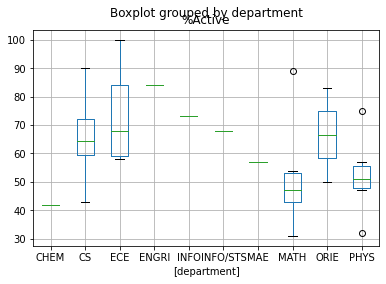

In [5]:
piazza_data.boxplot(column=['%Active'], by=['department'])

    - Though our course data is somewhat limited (for now), the trend seems that computer science and electrical and computer engineering courses have the most student engagement on piazza. 

**Relate intructor response time with percentage of active piazza users:**

Text(0, 0.5, '% of Enrolled students active')

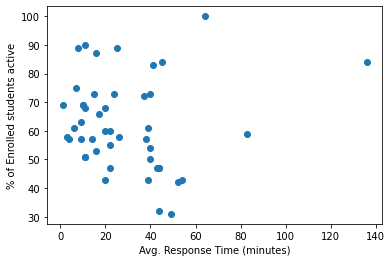

In [6]:
plt.scatter(piazza_data['Avg_Response_Time'], piazza_data['%Active'])
plt.xlabel('Avg. Response Time (minutes)')
plt.ylabel('% of Enrolled students active')

    - There is clearly a negative correlation between the average response time of a question and the proportion of students in a class that participate on piazza. Piazza participation could be influenced by many factors, such as the accessibility of office hours, or the use of it as a participation grade for the class. In this case we cannot determine if one factor causes the other, but it raises the question of whether the lower prospects of an immediate response discourages students from reaching out for help on piazza. 

### Ratemyprofessors:

**Relate course difficulty with course rating per review:**

Text(0, 0.5, 'Difficulty Ratings')

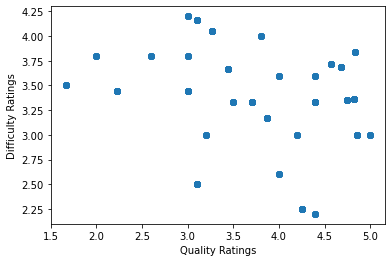

In [7]:
ratings_data['avg_quality'] = ratings_data.groupby(['Course #'])['Quality'].transform('mean')
ratings_data['avg_difficulty'] = ratings_data.groupby(['Course #'])['Difficulty'].transform('mean')
plt.scatter(ratings_data['avg_quality'], ratings_data['avg_difficulty'])
plt.xlabel('Quality Ratings')
plt.ylabel('Difficulty Ratings')

    - Based on the above plot, there is no apparent correlation between the quality of a professor's teaching and the difficulty of the class they taught. This might be due to many factors, including that some students want to be challenged by a class while some want to get a higher grade with less effort, or possibly that students do not associate the teaching skills of a particular professor with the difficulty of the material they teach, as it could just be the nature of the course to be more material heavy or abstract/technical. Relating this back to our research question, we cannot use the difficulty rank of a course to predict how "good" of an experience a student had in a course.

#### Cross analysis:

 - We will now merge our data into one, by course number

In [14]:

#merge datasets on professor name and course name
piazza_data['Professor'] = piazza_data['Professor'].str.strip()

all_data = ratings_data.merge(piazza_data, how='right',    right_on=['Course#','Professor'], left_on=['Course #','Name'])
all_data = all_data.drop(columns=['department_y', 'Class taught', 'course_num', 'Course #'])


all_data

,Name,Quality,Difficulty,Would Take Again,Date,course_number,department_x,avg_quality,avg_difficulty,Course#,Professor,Total_Q,%Response,#Contributions,Avg_Response_Time,Enrolled,instructor_response,%Active,semester
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHYS 2213,Alan Giambattista,473,100,1895,22,259,63,47,SP19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHYS 2213,Alan Giambattista,375,100,1842,14,242,78,57,SP20
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MATH 2930,Alan Zehnder,390,99,1398,39,417,74,43,SP20
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MATH 2930,Alan Zehnder,173,98,558,25,36,92,89,SP20
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MATH 1920,Reyer Sjamaar,323,100,1281,49,543,74,31,FA18
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORIE 2700,Yudong Chen,200,99,546,40,162,88,50,FA19
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECE 1210,David Albonesi,341,100,1204,26,135,90,58,SP19
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS 3220,Anil Damle,83,95,252,24,37,94,73,FA19
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS 2800,Michael George,1198,97,4700,20,419,85,60,SP19
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS 2800,Michael George,1554,96,4808,37,396,85,72,SP20


In [9]:
#write to csv file
import csv
all_data.to_csv('all_data.csv')

**Relate course rating with percentage of active users:**

Text(0, 0.5, 'Quality rating of professor')

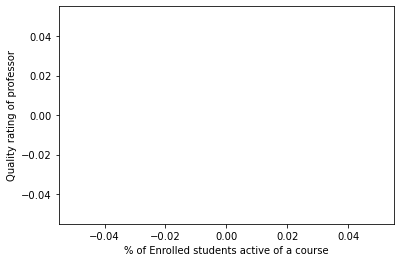

In [10]:
# all_data['avg_quality'] = all_data.groupby(['Course#'])['Quality'].transform('mean')
plt.scatter(all_data['%Active'], all_data['avg_quality'])
plt.xlabel('% of Enrolled students active of a course')
plt.ylabel('Quality rating of professor')

    - It seems there is a weak positive correlation between the quality rating of a professor and the proportion of students active on piazza. While we still cannot assume causation, we can see that an increased engagement on the piazza platform usually suggests students think more highly of the learning experience that professor creates.

**Relate course difficulty with percentage of active users** 

Text(0, 0.5, 'Difficulty rating of professor')

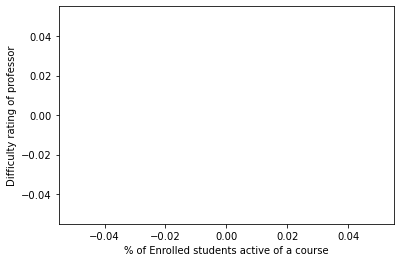

In [11]:
# all_data['avg_difficulty'] = all_data.groupby(['Course#'])['Difficulty'].transform('mean')
plt.scatter(all_data['%Active'], all_data['avg_difficulty'])
plt.xlabel('% of Enrolled students active of a course')
plt.ylabel('Difficulty rating of professor')

    - There is no strong correlation between the difficulty of a student's experience in a class with the proportion of active students on piazza. This is slightly surprising because we thought if more students found the course challenging, more of them would reach out for help in piazza.

**Compare quality and difficulty ratings across departments:**

In [12]:
print("Quality Ratings")
all_data['Quality'].hist(by=all_data['department_x'])

Quality Ratings


ValueError: Number of columns must be a positive integer, not 0

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Difficulty Ratings")
all_data['Difficulty'].hist(by=all_data['department_x'])

    -  Clearly we do not have enough data yet to see robust trends, but as we add more courses to our collection, we might get interesting results. Additionally, because we earlier established that computing-related departments tend to have more piazza engagement in their courses, maybe we could also spot an inter-department trend in ratings that correlates to the levels of piazza engagement.

### Questions for reviewers

* Do we have enough data to form significant data analysis with? We are planning to add more courses to our sample so that we have at least 30-40, particularly from some non-CS courses. Also, some of the professors we are looking at have relatively few reviews and we're not sure how much this says about a professor, if anything useful at all. 
* Some of the reviews have typos in the course name (eg, CS1110 is spelled CS11). How can we work around this? We don't want to lose data, especially when we have relatively reviews to work with, but this might also introduce ambiguity (what if that professor has taught another class that starts with "CS11"- ?)